# E-commerce supply chain project
### Jason Hart  <br>Phase_3<br>Cluade Fried ( Abhineet Kulkarni)

## Introduction: In this project we have received a data set which contains information about various products that are being shipped out of warehouses and whether or not they are being received by the customer on time.<br> Objective:  Our objective is to create a classification model which can predict from the products features, whether or not it will be received by the customer on time.<br>Then to determine the features with the greatest influence over the target and thus determine where we can adjust the process to increase the results of delivering the product on time.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score,\
GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,\
accuracy_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve,\
r2_score, mean_squared_error, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn


/Users/jasonhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('e_commerce_shipments.csv', header = 1)

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data EDA and visualization

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


We do not have any null data entries, there are no duplicate entries and the data is very clean and organized

In [6]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


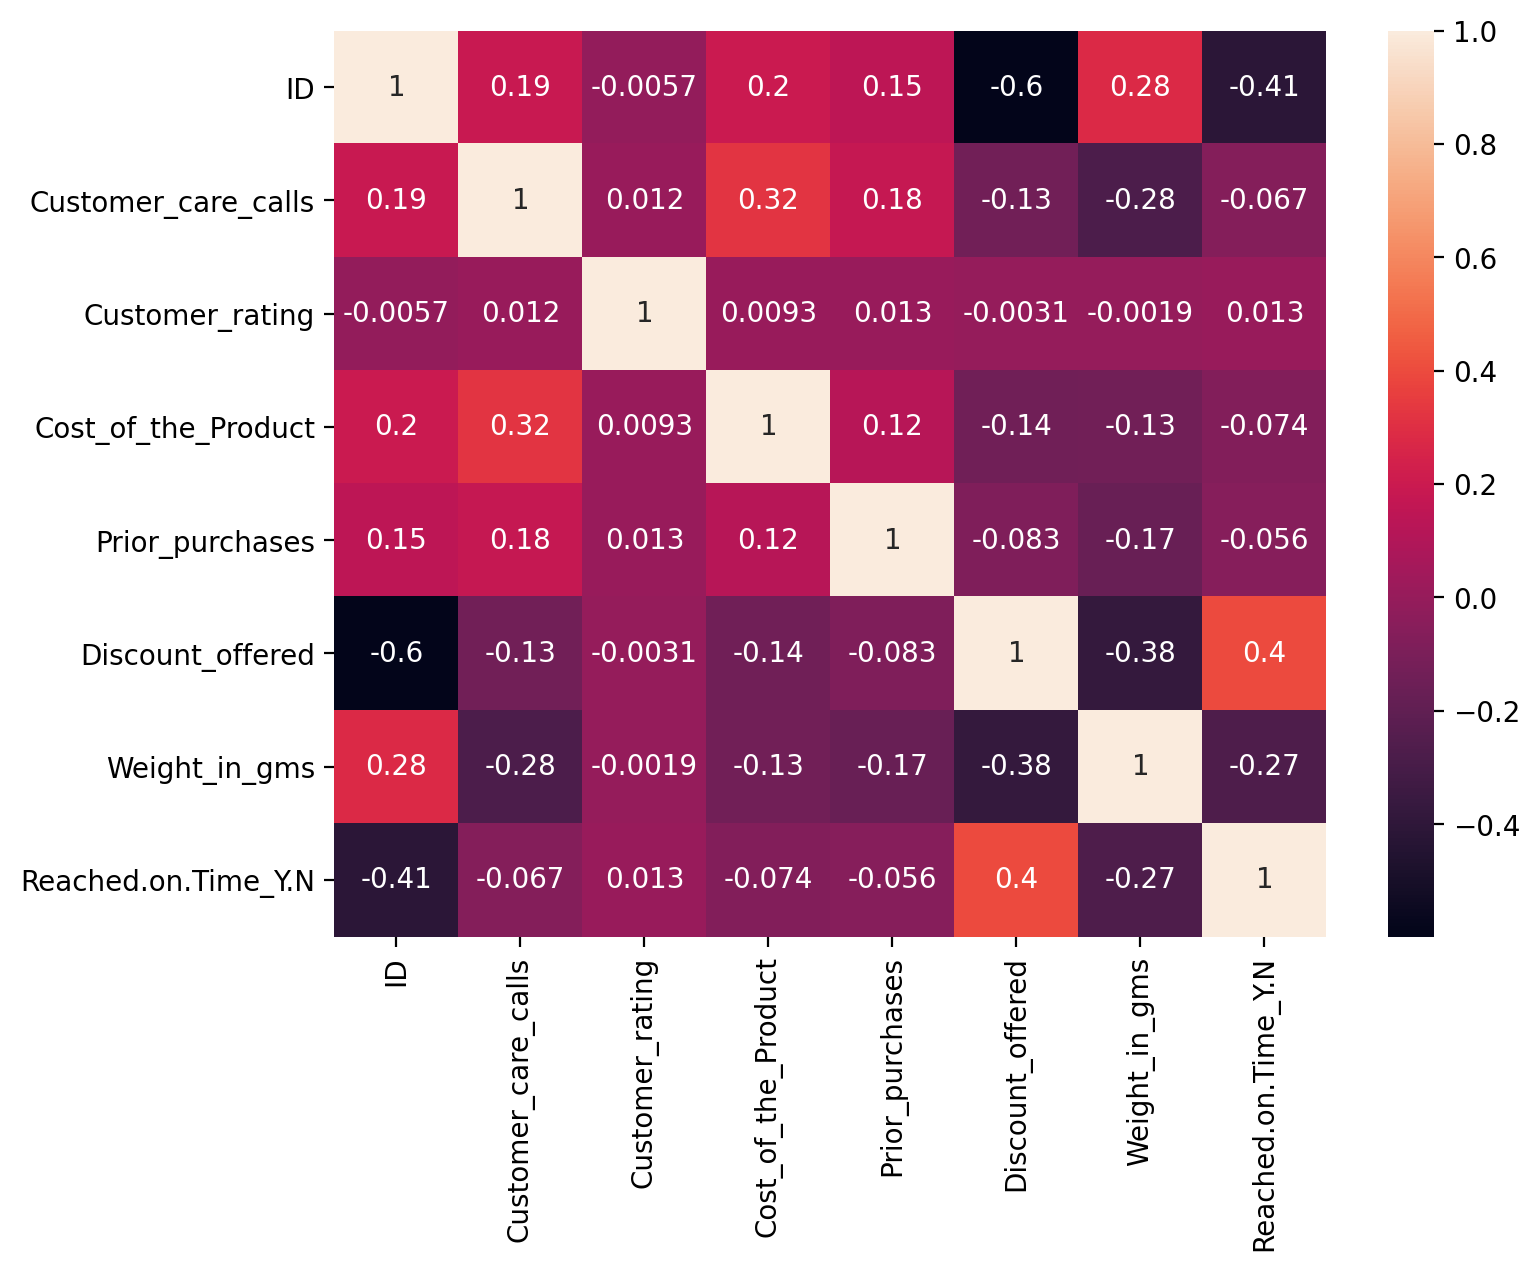

In [7]:
plt.subplots(figsize= (8,6), dpi=200)
sns.heatmap(data = df.corr(), annot = True)
plt.show()

The correlation matrix within the heat map shows that the between cost_of_the_product, weight_in_grams and the Discount_offered are the highest correlated features to the target.

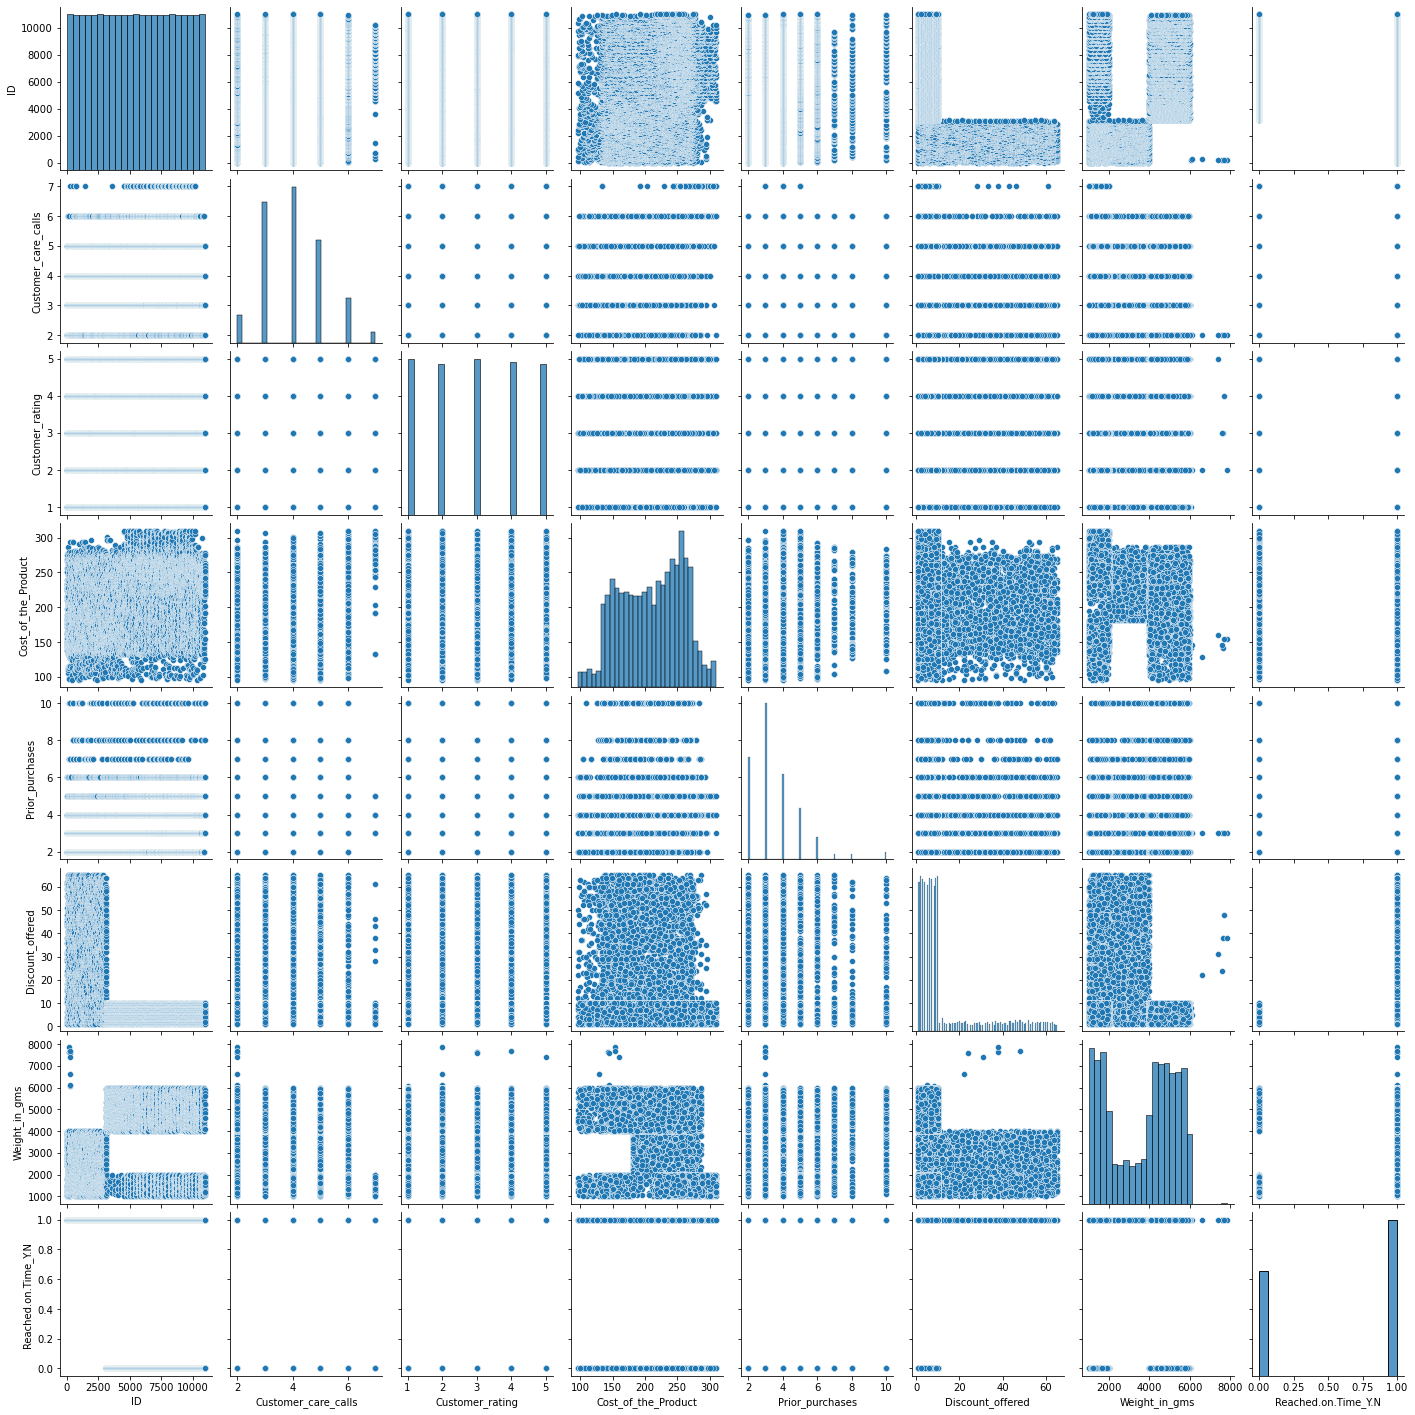

In [8]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

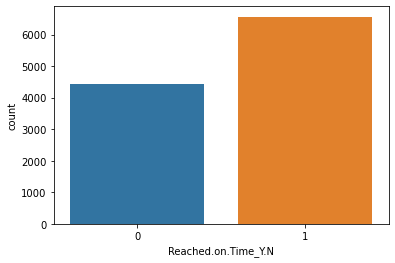

In [73]:
sns.countplot(df['Reached.on.Time_Y.N'])

In [93]:
arrived_on_time = df[df['Reached.on.Time_Y.N'] == 1]
not_arrived_on_time = df[df['Reached.on.Time_Y.N'] == 0]
print("Percentage of product that arrived on time was; ", len(arrived_on_time)/len(df['Reached.on.Time_Y.N']))
print("Percentage of product that arrived not on time was; ", len(not_arrived_on_time)/len(df['Reached.on.Time_Y.N']))

Percentage of product that arrived on time was;  0.5966906082371125
Percentage of product that arrived not on time was;  0.40330939176288755


Our data set is not perfectly balance, but with a 60/40 split it is alos not completely unbalanced, the fact that 40% of our deliveries do not arrive on time, means that we do have an oppourtunity to improve our delivery on time rate

## Baseline Models

### Utilizing a Logistics Regression as the initial baseline model

In [9]:
X= df.drop('Reached.on.Time_Y.N', axis = 1)
y= df['Reached.on.Time_Y.N']

In [10]:

numerical = ['Customer_care_calls',
             'Customer_rating',
             'Cost_of_the_Product',
             'Prior_purchases',
             'Discount_offered',
             'Weight_in_gms']
cat = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

Splitting data into categorical and numerical for modeling

In [11]:
X_dummies = pd.get_dummies(X.select_dtypes('object'), drop_first=True)
X_dummies = pd.concat([X.select_dtypes('int'), X_dummies], axis = 1).drop('ID', axis = 1)

Splitting the data into numerical data and categorical data so that we can scale and encode the data for modeling

In [12]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        10999 non-null  int64
 1   Customer_rating            10999 non-null  int64
 2   Cost_of_the_Product        10999 non-null  int64
 3   Prior_purchases            10999 non-null  int64
 4   Discount_offered           10999 non-null  int64
 5   Weight_in_gms              10999 non-null  int64
 6   Warehouse_block_B          10999 non-null  uint8
 7   Warehouse_block_C          10999 non-null  uint8
 8   Warehouse_block_D          10999 non-null  uint8
 9   Warehouse_block_F          10999 non-null  uint8
 10  Mode_of_Shipment_Road      10999 non-null  uint8
 11  Mode_of_Shipment_Ship      10999 non-null  uint8
 12  Product_importance_low     10999 non-null  uint8
 13  Product_importance_medium  10999 non-null  uint8
 14  Gender_M              

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 1976)

In [14]:
X_dummies

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,0,0,0,0,0,1,0,1,0
10995,4,1,232,5,6,1247,1,0,0,0,0,1,0,1,0
10996,5,4,242,5,4,1155,0,1,0,0,0,1,1,0,0
10997,5,2,223,6,2,1210,0,0,0,1,0,1,0,1,1


creating pipelines for preprocessing so that we limit data leakage and having to standardize the data each time for modeling

In [15]:
subpipe_num = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(drop='first',sparse=False, handle_unknown='error'))])

In [16]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, numerical),
                                    ('subpipe_cat', subpipe_cat, cat)],
                                    remainder='passthrough')

In [17]:
log_reg_pipe = Pipeline(steps=[('CT', CT),
                               ("log_reg", LogisticRegression(random_state=1976))])

In [18]:
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                            

In [19]:
y_preds_log = log_reg_pipe.predict(X_train)


In [20]:
# creating a function for creating reports for each model
def reports(y, x, model):
    y_pred = model.predict(x)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, cmap='mako', fmt='g')

    print(classification_report(y, y_pred))
    plot_roc_curve(model, x, y)
   
    

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      3536
           1       0.73      0.69      0.71      5263

    accuracy                           0.66      8799
   macro avg       0.65      0.65      0.65      8799
weighted avg       0.66      0.66      0.66      8799



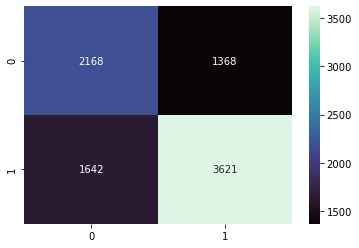

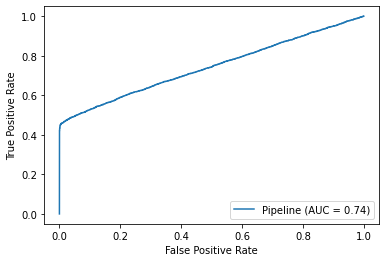

In [21]:
reports(y_train, X_train, log_reg_pipe)

So the basic model leaves a little something to be desired, the accuracy is only 65%, there is a large portion of false negatives and false positives which will cause us to misinterpret if the product will be delivered on time and thus cause aggrevation for the customer

## SVM modeling attempt to improve prediction

Utilizing SVM modeling as attempt to improve model predictions

In [22]:
svm_reg_pipe = Pipeline(steps=[('CT', CT),
                              ('svc', SVC())])

In [23]:
svm_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                            

              precision    recall  f1-score   support

           0       0.57      0.91      0.70      3536
           1       0.90      0.53      0.67      5263

    accuracy                           0.68      8799
   macro avg       0.73      0.72      0.68      8799
weighted avg       0.77      0.68      0.68      8799



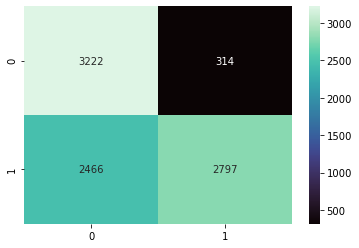

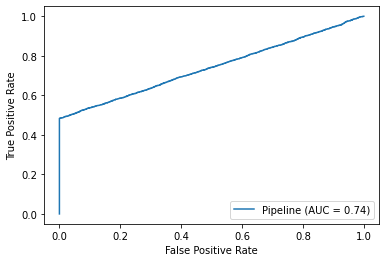

In [24]:
reports(y_train, X_train, svm_reg_pipe)

some model improvement, still struggling to eliminate fales negative which would cause us to assume that a product will be delivered late when it will not be, but this is in the customers favor and thus not as detrimental as if we predicted on time and it arrived late

## Classifiers and model tuning

### Random Forest classifiers


In [25]:
rand_forest_parms = {
                     'criterion': ['gini', 'entropy'],
                     'max_depth':(6, 25, 50, 70),
                     'min_samples_split': (2, 5, 10),
                     'min_samples_leaf': (1, 2, 10)}

In [26]:
rfc_pipe = Pipeline(steps=[('CT', CT),
                         ('rfc', RandomForestClassifier(
                          ))])

In [27]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [28]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                            

In [29]:
rf = RandomForestClassifier()

In [30]:
rfc_pipe.score(X_train, y_train)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3536
           1       1.00      1.00      1.00      5263

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799



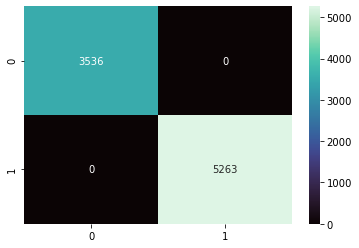

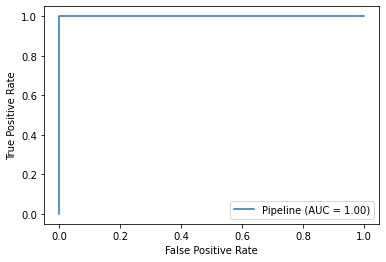

In [31]:
reports(y_train, X_train, rfc_pipe)

Althought this says that it is a perfect fit, it is due to overfitting of the hyperparameter, we will test the test set below to determine if this is actually a predictive model or if this is just overfitting

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       900
           1       0.79      0.59      0.68      1300

    accuracy                           0.66      2200
   macro avg       0.68      0.68      0.66      2200
weighted avg       0.70      0.66      0.67      2200



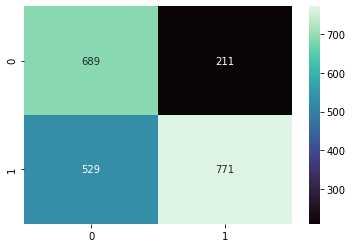

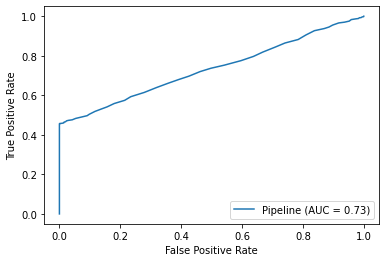

In [32]:
reports(y_test, X_test, rfc_pipe)

As expected the perfect fit above was due to overfitting and we have ended up having a structure where the percentage of 

In [33]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rand_forest_parms,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [34]:
rs_rf_pipe = Pipeline(steps=[('CT', CT),
                            ('rs_rf', rs_rf)])

In [35]:
rs_rf_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.4s finished


Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                            

In [36]:
rs_rf_pipe

Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                            

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      3536
           1       1.00      0.50      0.67      5263

    accuracy                           0.70      8799
   macro avg       0.78      0.75      0.70      8799
weighted avg       0.83      0.70      0.69      8799



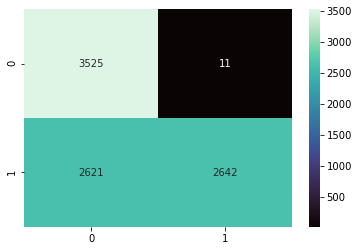

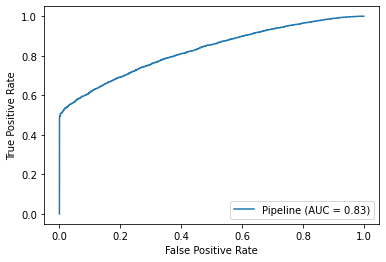

In [37]:
reports(y_train, X_train, rs_rf_pipe)

In [38]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_dummies, y)

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]



In [40]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [41]:
rfr = RandomForestRegressor()

In [42]:
rf_random = RandomizedSearchCV(estimator = rfr,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)


In [43]:
rf_random.fit(X_train_rs, y_train_rs)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 112, 223, 334, 445,
                                                         556, 667, 778, 889,
                                                         1000]},
                   random_state=42, verbose=2)

In [44]:
best_param_rs = rf_random.best_params_
best_param_rs

{'n_estimators': 223,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [45]:
rfg = RandomForestRegressor(n_estimators= 667,
                             min_samples_split= 5,
                             min_samples_leaf= 1,
                             max_features= 'sqrt',
                             max_depth= 30,
                             bootstrap= True
)

In [46]:
rfg.fit(X_train_rs, y_train_rs)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=667)

In [47]:
rfg.score(X_train_rs, y_train_rs)

0.7374074216674207

In [48]:
rfg.score(X_test_rs, y_test_rs)

0.2312640883381284

Running the Random Forest Regressor on the Train data provide very positive results, but once we ran it on the test data we were able to realize that the model was overfitten to the Train data and was a poor fit for the test data, so this model will not work going forward because it cannot predict data which it has not already seen. 

### KNneighbors test

In [49]:
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
neighbors = range(1,21)

In [50]:
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train_rs, y_train_rs )
    train_scores.append(knn.score(X_train_rs, y_train_rs))
    test_scores.append(knn.score(X_test_rs, y_test_rs))

In [51]:
train_scores

[1.0,
 0.820826766880834,
 0.8230088495575221,
 0.779488422839132,
 0.7815492787004485,
 0.7559704206570493,
 0.7593647714874531,
 0.7451812340889805,
 0.749181718996242,
 0.737059037459086,
 0.7376651715359438,
 0.7318462843981088,
 0.7299066553521639,
 0.7250575827373015,
 0.7232391805067281,
 0.7209358710146685,
 0.7154806643229482,
 0.7153594375075767,
 0.7165717056612922,
 0.7123287671232876]

Maximum KNN score on the test data: 66.98%


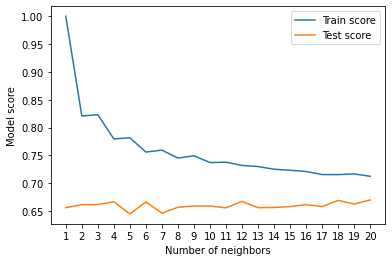

In [52]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Model not performing well on the test set, overfitting on the training set when their are only a few neaghbors involved, but as it adds neighbors even the Train nodel is performing at below a 75% prediction rate.  Train data performed better with less neaighbors and complexity but then when running data the model had not seen, we flattened out and produced a model similar what we had seen before.  Again this can be explained by the hyperparameters being overfit to the Train data. 

# Feature Importance

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(X_train_rs, y_train_rs)

DecisionTreeClassifier()

In [55]:
feature_importance = pd.DataFrame(
    dt.feature_importances_,
    index = X_train_rs.columns,
    columns=['Importance']).sort_values('Importance', ascending=False)


In [56]:
feature_importance

,Importance
Discount_offered,0.298636
Weight_in_gms,0.238894
Cost_of_the_Product,0.152402
Prior_purchases,0.070482
Customer_care_calls,0.048372
Customer_rating,0.046154
Mode_of_Shipment_Ship,0.021258
Gender_M,0.018814
Warehouse_block_F,0.017604
Warehouse_block_D,0.016198


Looking at the Feature importance and utilizing inferential knowledge, such as the fact that the customer rating and the customer care calls will only come after the fact that the product has been delivered.  We will begin to model the prediction off of the top 4 features.

In [57]:
X_imp = df[['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product', 'Prior_purchases']]

In [58]:
log_reg_pipe2 = Pipeline(steps=[('SS', StandardScaler()),
                               ('Log_reg', LogisticRegression())])

In [59]:
log_reg_pipe2.fit(X_imp, y)

Pipeline(steps=[('SS', StandardScaler()), ('Log_reg', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      4436
           1       0.70      0.68      0.69      6563

    accuracy                           0.64     10999
   macro avg       0.63      0.63      0.63     10999
weighted avg       0.64      0.64      0.64     10999



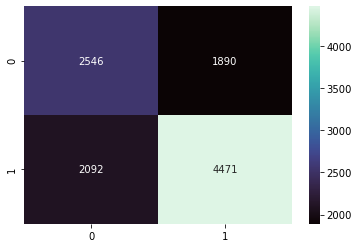

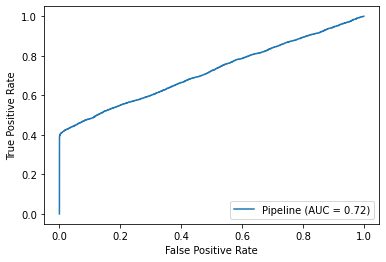

In [60]:
reports(y, X_imp, log_reg_pipe2)

Utilizing only the features with the Highest importance did very little to improve model.  We still had 1890 false negavtives and 2092 false positives and we are only able to show 72% of the data under our AUC curve

## Naive Bayes Model running

In [61]:

nb_pipe = Pipeline(steps=[('ss', StandardScaler()),
                         ('NB', GaussianNB())])

In [62]:
nb_pipe.fit(X_imp, y)

Pipeline(steps=[('ss', StandardScaler()), ('NB', GaussianNB())])

              precision    recall  f1-score   support

           0       0.54      0.97      0.69      4436
           1       0.96      0.43      0.60      6563

    accuracy                           0.65     10999
   macro avg       0.75      0.70      0.64     10999
weighted avg       0.79      0.65      0.63     10999



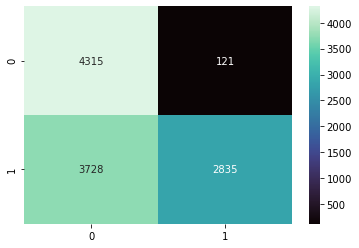

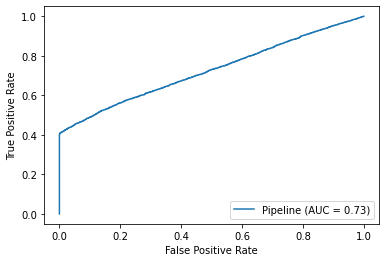

In [63]:
reports(y, X_imp, nb_pipe)

Naive Bayes has given us a better model but is still predicting too many False positives of 3728, although this model does a better job of reducing false negative, which went down to 121 and we were able to increase our explained data under the AUC curve to 73%

# Utilizing XGboost to attempt to better the model

In [64]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y, test_size = .2, random_state = 1976)

In [65]:
pipe_xg = Pipeline(steps=[('SS', StandardScaler()),
                         ('xg', XGBClassifier())])

In [66]:
pipe_xg.fit(X_imp, y)

Pipeline(steps=[('SS', StandardScaler()),
                ('xg',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [67]:
y_pred_xg = pipe_xg.predict(X_train_imp)
cm_xg = confusion_matrix(y_train, y_pred_xg)

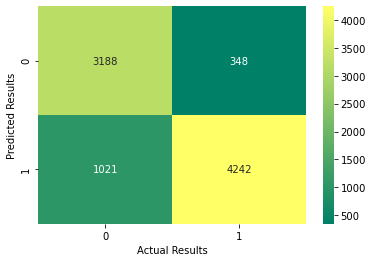

In [68]:
fig, ax = plt.subplots(figsize= (6,4))
sns.heatmap(cm_xg, annot = True, fmt = 'g', cmap = 'summer')
plt.ylabel('Predicted Results')
plt.xlabel("Actual Results")
plt.show()

In [70]:
y_pred_xg_test = pipe_xg.predict(X_test_imp)
print(classification_report(y_test, y_pred_xg_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       900
           1       0.92      0.80      0.86      1300

    accuracy                           0.84      2200
   macro avg       0.84      0.85      0.84      2200
weighted avg       0.85      0.84      0.84      2200



              precision    recall  f1-score   support

           0       0.75      0.91      0.82       900
           1       0.92      0.80      0.86      1300

    accuracy                           0.84      2200
   macro avg       0.84      0.85      0.84      2200
weighted avg       0.85      0.84      0.84      2200



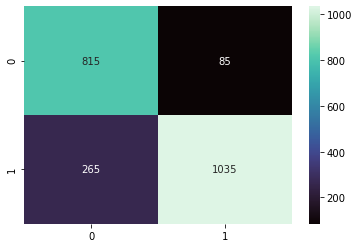

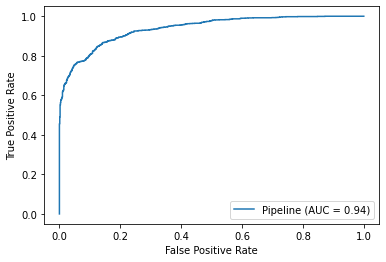

In [71]:
reports(y_test_imp, X_test_imp, pipe_xg)


XGboost model has been able to define incorporate the data and succesfully give us a predictive model with an accuraccy score of 84%

## Results for Final model using XGboost

__Precision__ -  Our model gave us a precision of 75% <br>
__Recall__ -  Our model gave us a recall of 80 %.<br>
__F1 score__ -   Our F1 score was 86%<br>
__Accuracy__ - Our model had an accuracy of 84%<br>
__Macro avg__ - Our macro average for the final model is 84% for precision, 85% for recall and 84% for F1.<br>
__Weighted avg__ - Our sample was not even and thus the weighted average is more important and our model gave us a 85% for precision, 84% for recall and 84% for F1 score

In [72]:
print(classification_report(y_test, y_pred_xg_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       900
           1       0.92      0.80      0.86      1300

    accuracy                           0.84      2200
   macro avg       0.84      0.85      0.84      2200
weighted avg       0.85      0.84      0.84      2200



# Conclusion:

The results of the model gave us a precision of 80% and only 265 false posative results, only 85 nfalse negative and false negatives will give us the most issues, because if we can predict that the product is going to be delivered late, then we can inform the customer and eleviate many of our unsatissfied customers by keeping them informed.  The biggest issue is when we beleive the product will be on time, but it ends up being delivered late.

In conclusion we were able to come up with a workable model which gives a solid way to predict wether or not a package will arrive on time.  The final model gives us the ability to eliviate a lot of concern with the customer and to help them understand when a package will be delivered to them. 

# Recomendations 

As we saw earlier the most influential features are Discount_offered, Weight_in_gms, Cost_of_the_Product and Prior_purchases.  	
- Discount offered is the feature with the greatest effect on the ability to ship on time, the recomendation is to set up an area in the warehouse to house the product that will be on discount.  This will allow for the rapid picking and packing of these products and thus get them to the carrier faster and more efficiecntly
- Weight is the feature with the next highest effect on our target and the reccomendation is to create a place in the warehouse were the larger items will be stored and thus allow for these products to be handled quicker and more efficiently
- Cost of product is our third highest feature and the recomendation for this is to segregate the high cost items and allow for them to be picked in a quicker manner.

The Efficiency of the warehouse is determined by the layout and the funcionability of the warehouse, so focusing on the features with the highest efficiency will allow us to perform at our maximum ability.